In [1]:
# Импорт библиотек
import pandas as pd 
import numpy as np 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
from calendar import monthrange

In [2]:
# Загружаем датасеты
order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')
orders      = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw')
customers   = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')

In [3]:
#Проверяем типы в датасетах
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [4]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [5]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
# Изменяем тип для дат в orders
date_columns=['order_purchase_timestamp','order_approved_at',
              'order_delivered_carrier_date',
              'order_delivered_customer_date','order_estimated_delivery_date']
orders[date_columns]=orders[date_columns].apply(pd.to_datetime)

In [7]:
# Проверяем изменение
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

-

В датасете orders - у нас информация по заказам, их статусам и установки времени на каком либо из этапов,
customers - данным по клиентам,почтовый индекс, город и штат
order_items - все содержимое заказа

У нас не так много описывающих что-то, можем описать данные с order_items 

In [8]:
order_items.describe()
# Методом describe выявили среднее значение цены, веса, их максимум и минимум. 
# Будем осведомлены и каких то сильно выбиващихся значений не замечаем

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [9]:
# Проверим полноту данных
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [11]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
orders.head(10)
# У нас есть пропуски в некоторых столбцах с датами. Так как заказы не дошли до какого либо из статусов заказа

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


Данные orders и order_items связаны.
Вопрос, все ли заказы из orders есть в order_items и наоборот. Данные одной из таблиц служат источником

In [13]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [14]:
order_items.nunique()
# У нас 99441 уникальных заказа в orders и 98666 заказов в order_items. Похоже не все заказы есть order_items. 
# Подозреваю, что это вполне возможно могут быть отмененные или недоступные заказы 

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [15]:
check_order=orders.merge(order_items,how='left',on='order_id')

In [16]:
check_order[check_order['product_id'].isna()].order_status.value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

Как и думал ранее, у нас больший пул заказов отсутствующих в order_items это заказы в статусе unavailable и canceled, но есть 5 заказов созданных, 2 оплаченных и 1 уже отгрузили со склада. Интересно понять, что же мы везем клиенту. Отправим эти заказы на проверку

Этап исследования данных закончили дальше по заданиям

# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 



Во-первых, необходимо понять что мы будем считать покупкой
У нас есть 8 статусов заказа.
created —  создан
approved —  подтверждён
invoiced —  выставлен счёт
processing —  в процессе сборки заказа
shipped —  отгружен со склада
delivered —  доставлен пользователю
unavailable —  недоступен
canceled —  отменён

Из всех точно можно убирать недоступные,отменненные, созданные и выставленные счета. Процесс либо уже закончился либо только начинается.

По моему мнению, покупкой будет учитываться только заказы в статусе Доставлен(Delivered). Мы доставили заказ, получили оплату. Больше процессов нет. На любом из другом статусов у нас все еще присуствует вероятность отмены со стороны клиента заказа или процесс может поломаться

Решено, берем только delivered

In [17]:
user_order=orders.merge(customers,how='left',on='customer_id')

In [18]:
user_order.query('order_status=="delivered"')\
.groupby('customer_unique_id',as_index=False)\
.agg({'order_id':'nunique'})\
.sort_values('order_id',ascending=False)\
.query('order_id==1')

,customer_unique_id,order_id
62128,aa2cdc62c7b89b46ec1ba94671673fef,1
63577,ae1ae3876de9647147dbc7a9c13921db,1
63769,ae9b719375655dab3c518d76cc37a843,1
63771,ae9de284f9466c14dc7d15e9f3002e27,1
62403,aae6530a7fc9a3cd24a6bb4c40dca541,1
...,...,...
31564,565811ed44e539a14bc391cf57373ed1,1
31563,5657f9f721c16800a66c21081d46b18d,1
31562,5657dfebff5868c4dc7e8355fea865c4,1
31561,5657596addb4d7b07b32cd330614bdf8,1


Подтянул к orders данные с таблицы customers. Так как все customer_id в orders уникальны для каждого заказа. Добавил данные уникального id клиента. Данные сгрупировал, расчитал кол-во уникальных заказов и отфильтровал только те, где на одного клиента приходится 1 заказ. 

# Итого: 90557 клиентов  совершивших покупку только один раз

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

Сразу перейдем к вопросу, какой заказ будем учитывать как не доставленный.
Логичо что все заказы в статусах canceled,unavailable. А можем ли добавить что-то еще. Доставленные конечно же учитывать не можем

Можно предположить диапазон дат и утверждать что заказы, которые очень долго с момента создания висят на определенном статусе уже не будут доставлены


In [19]:
orders.min()

order_id                         00010242fe8c5a6d1ba2dd792cb16214
customer_id                      00012a2ce6f8dcda20d059ce98491703
order_status                                             approved
order_purchase_timestamp                      2016-09-04 21:15:19
order_approved_at                             2016-09-15 12:16:38
order_delivered_carrier_date                  2016-10-08 10:34:01
order_delivered_customer_date                 2016-10-11 13:46:32
order_estimated_delivery_date                 2016-09-30 00:00:00
dtype: object

In [20]:
orders.max()

order_id                         fffe41c64501cc87c801fd61db3f6244
customer_id                      ffffe8b65bbe3087b653a978c870db99
order_status                                          unavailable
order_purchase_timestamp                      2018-10-17 17:30:18
order_approved_at                             2018-09-03 17:40:06
order_delivered_carrier_date                  2018-09-11 19:48:28
order_delivered_customer_date                 2018-10-17 13:22:46
order_estimated_delivery_date                 2018-11-12 00:00:00
dtype: object

У нас есть максимальная дата, будем на ее основании предполагать что датафрейм мы смотрим как раз таки на ее момент. 
2018 год 17 октября

In [21]:
# Посчитаем разницу между датой создания и датой фактической доставки, поймем как долго мы доставляем заказы обычно
orders['razn']=orders['order_delivered_customer_date']-orders['order_purchase_timestamp']

In [22]:
# Посмотрим какая разница у нас в целом бывает начиая от меньших значений
orders.query('order_status=="delivered"').sort_values('razn')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,razn
31522,1d893dd7ca5f77ebf5f59f0d2017eee0,b19da0df0271e8a3553e3670f86aeab5,delivered,2017-06-19 08:19:45,2017-06-19 08:30:20,2017-06-19 13:32:04,2017-06-19 21:07:52,2017-06-30,0 days 12:48:07
41803,434cecee7d1a65fc65358a632b6f725f,922a46283625e9c096bfd998913c470c,delivered,2017-05-29 13:21:46,2017-05-29 13:30:24,2017-05-29 14:54:51,2017-05-30 08:06:56,2017-06-19,0 days 18:45:10
38792,f3c6775ba3d2d9fe2826f93b71f12008,6aef84c09844a371d82a49152c550b95,delivered,2017-07-04 11:37:47,2017-07-04 11:50:21,2017-07-04 13:53:13,2017-07-05 08:09:26,2017-07-17,0 days 20:31:39
97428,8339b608be0d84fca9d8da68b58332c3,ff58662c328f81d3ee549c9caa942f39,delivered,2018-06-26 20:48:33,2018-06-26 21:07:25,2018-06-27 11:31:00,2018-06-27 17:31:53,2018-07-25,0 days 20:43:20
69580,bb5a519e352b45b714192a02ffe25681,118295a853acb536efff13740faf5be8,delivered,2017-05-31 11:11:55,2017-05-31 11:22:55,2017-05-31 11:36:15,2017-06-01 08:34:36,2017-06-27,0 days 21:22:41
...,...,...,...,...,...,...,...,...,...
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,NaT
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,NaT
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,NaT
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,NaT


У нас есть какие-то заказы в статусе доставлен, но не имеющих время доставки заказа до клиента

In [23]:
orders[orders['razn'].isna()].query('order_status=="delivered"')
# 8 заказов в статусе доставлен не имеющих дату доставки 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,razn
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,NaT
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,NaT
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,NaT
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,NaT
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,NaT
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,NaT
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,NaT
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,NaT


In [24]:
# Проверим обратное, нет ли у нас случаем заказов с датой доставки, имеющих другой статус
orders[orders['razn'].notna()].order_status.value_counts()
# есть заказы со статусом отмены и имеющими дату доставки. Похоже заказы доставили, но позднее была произведена отмена заказа

delivered    96470
canceled         6
Name: order_status, dtype: int64

In [25]:
# Возвращаясь к времени доставки, посмотрим примерный диапазон времени, только по доставленным и имеющим дату доставки
orders[orders['razn'].notna()].query('order_status=="delivered"').razn.describe()

count                         96470
mean     12 days 13:23:49.957271690
std       9 days 13:06:27.911052929
min                 0 days 12:48:07
25%                 6 days 18:23:20
50%                10 days 05:13:10
75%         15 days 17:17:03.750000
max               209 days 15:05:12
Name: razn, dtype: object

В среднем доставляем за период в 12 дней, есть совершенно быстрые кейсы за период в 12 часов. Так и заоблачно высокий период в 209 дней. Поражаюсь выдержки клиента. В целом даже в 75 процентиле доставка проходит в течении 15 дней. Обратимся к процентилям

In [26]:
# Возьмем за основу 99.9 процентиль, 83 дня и 3 часа, мы делаем допущение на 0.1% заказов, которые будут доставлены позднее
orders['razn'].quantile(0.999)

Timedelta('83 days 03:20:51.875000198')

Как и отмечал ранее,смотрим все данные на момент 17 октября 2018 года. Берем эту дату, высчитываем для каждого заказа момент времени от даты создания до текущей даты и считаем недоставленными все заказы превыщающие 99.9 процентиль нашего времени доставки.

In [27]:
maybe_today_date= dt.datetime(2018,10,17,17,40,0) # Год, месяц, день, час, минута, секунда


In [28]:
orders['dost_check']=maybe_today_date-orders['order_purchase_timestamp']

In [29]:
orders.query('order_status!="canceled" & order_status!= "unavailable" & order_status!= "delivered"').sort_values('dost_check')
# К примеру у нас есть заказ, который находится на статусе shipped уже более 2 лет

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,razn,dost_check
62360,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,NaT,44 days 08:33:03
22575,6ca46f2b9a1592929647682510800e0e,13bf775a749925a15ef7cc1985b564f1,shipped,2018-08-24 17:02:19,2018-08-24 17:15:10,2018-08-27 15:15:00,NaT,2018-08-29,NaT,54 days 00:37:41
24944,99b3fb1a943fa5d4af2a3386f00fdd19,aa03e52d50af7237a5963ffb09dd8872,shipped,2018-08-22 09:01:17,2018-08-22 09:10:17,2018-08-23 14:09:00,NaT,2018-08-30,NaT,56 days 08:38:43
72213,2a06568281fa1a485b9ba5fac48c7df2,317b6bd739f5504c8cdb3979cdca9328,shipped,2018-08-21 11:00:37,2018-08-21 11:10:17,2018-08-21 17:04:00,NaT,2018-08-24,NaT,57 days 06:39:23
29651,f73b31435ce6dec43df056154c39a1ce,f0f671d4034e98cdf20f0c452d6db02b,shipped,2018-08-20 12:37:54,2018-08-20 15:35:42,2018-08-24 16:48:00,NaT,2018-08-27,NaT,58 days 05:02:06
...,...,...,...,...,...,...,...,...,...,...
32817,a6475bb7a50387e3c665534e15bd40ac,442d66f0d96f656096dd70f1b0391e40,invoiced,2016-10-04 16:28:25,2016-10-05 02:46:17,NaT,NaT,2016-11-28,NaT,743 days 01:11:35
18535,5cb8558cbb7c0c2f00f43468579d3e3c,2ff5a6455514da421bd25d6e4ceb1d12,shipped,2016-10-04 15:02:37,2016-10-05 03:10:59,2016-10-15 10:14:10,NaT,2016-12-02,NaT,743 days 02:37:23
24222,711b9be9c346d9ecdb9d38a5e1e7e39b,81e4aed5ab4253757305267b80712689,invoiced,2016-10-04 13:38:37,2016-10-04 14:08:38,NaT,NaT,2016-11-24,NaT,743 days 04:01:23
78824,dd359d3c294458c6d642b2eea9212bf5,5c58d1ea5a893380ecdd96dd6dfd5ec5,invoiced,2016-10-04 13:02:10,2016-10-05 03:08:27,NaT,NaT,2016-11-24,NaT,743 days 04:37:50


In [30]:
orders['uslovie_dost']=np.where( 
     (orders['order_status'].isin(['canceled','unavailable'])) | 
     (orders['dost_check']<=orders['razn'].quantile(0.999)), 
     True,False)

Условие задали в столбце условие дост, теперь соответственно берем заказы со статусами canceled и unavailable, либо в других статусах кроме Доставлен которые превышают 99.9 процентиль нашего времени доставки для доставленных заказов

In [31]:
orders.query('uslovie_dost==True').order_status.value_counts()

delivered      7602
canceled        625
unavailable     609
shipped          59
invoiced         26
Name: order_status, dtype: int64

Итого у нас такие данные по заказам недоставленным и причинам(статусам на которых они остановились) Дополнительно помним что среди отмененных у нас есть 6 заказов, которые мы доставили но в последствии они были отменены

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

Будем учитывать только заказы в статусе доставлен так как смотрим только покупки. Обьяснение было выше

In [32]:
# Добавляем столбец с днем недели для даты создания заказа
orders['weekday']=orders.order_purchase_timestamp.dt.day_name()

In [33]:
for_weekday=orders.merge(order_items,how='left',on='order_id')

In [34]:
# Делаем табличку, где будем отображать кол-во заказов на item по дням
item_day_order=for_weekday.query('order_status=="delivered"').groupby(['product_id','weekday'],as_index=False).agg({'order_id':'count'})

In [35]:
# Создаем табличку, где узнаем максимальное количество покупок для товара среди дней недели
max_for_item=item_day_order.groupby('product_id',as_index=False).agg({'order_id':'max'})

In [36]:
max_for_item.columns=['product_id','max_count']

In [37]:
# Соберем в одну таблицу
popular_day_item=item_day_order.merge(max_for_item,how='left',on='product_id')
popular_day_item.columns=['product_id','weekday','count_order','max_count']

In [38]:
# У нас есть товар, день недели, в каком количестве заказов был данный товар в эти дни и максимальное значение среди всех дней недели 
popular_day_item.query('max_count==count_order').sort_values('count_order',ascending=False)

,product_id,weekday,count_order,max_count
15597,422879e10f46682990de24d770e7f83d,Wednesday,93,93
35751,99a4788cb24856965c36a24e339b6058,Monday,91,91
40183,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89,89
19711,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76,76
13271,389d119b48cf3043d311335e499d9c6b,Thursday,67,67
...,...,...,...,...
23011,620f37abb44d006ced91c81d81db0412,Monday,1,1
23010,620f37abb44d006ced91c81d81db0412,Friday,1,1
23009,620ea491128bf83c51950ac006de001d,Tuesday,1,1
23008,620b45f968a49556658d15ef8560a30d,Tuesday,1,1


Закрепляя, мы получили для каждого товара популярные дни покупки. У какого-то из товаров их может быть несколько, у другого же это может быть всего один день среди недели

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 


In [39]:
# Определяем сколько дней в месяце по столбцу с датой создания заказа
orders['days_in_month']=orders['order_purchase_timestamp'].dt.days_in_month

In [40]:
# Считаем сколько у нас недель в месяце для каждого из месяцев
orders['week_in_month']=orders['days_in_month']/7

In [41]:
# Проводим Join данных заказов и клиентов, чтобы вывести статистику по клиентам 
for_week_month_user=orders.merge(customers,how='left',on='customer_id')

In [42]:
# Создаем два столбца с годом и месяцем
for_week_month_user['year'] = for_week_month_user['order_purchase_timestamp'].dt.year
for_week_month_user['month']= for_week_month_user['order_purchase_timestamp'].dt.month

In [43]:
# Расчёт для каждого клиента по месяцу и году кол-во заказов
week_month_user=for_week_month_user.query('order_status=="delivered"')\
.groupby(['customer_unique_id','year','month','days_in_month','week_in_month'],as_index=False)\
.agg({'order_id':'nunique'})

In [44]:
# Переименую столбец корректно
week_month_user.columns=week_month_user.columns.str.replace('order_id','count_order')

In [45]:
# Создаем столбец с метрикой
week_month_user['avg_per_month_week']=week_month_user['count_order']/week_month_user['week_in_month']

In [46]:
week_month_user

,customer_unique_id,year,month,days_in_month,week_in_month,count_order,avg_per_month_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,31,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,31,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017,3,31,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,31,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017,11,30,4.285714,1,0.233333
...,...,...,...,...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,30,4.285714,1,0.233333
95190,fffea47cd6d3cc0a88bd621562a9d061,2017,12,31,4.428571,1,0.225806
95191,ffff371b4d645b6ecea244b27531430a,2017,2,28,4.000000,1,0.250000
95192,ffff5962728ec6157033ef9805bacc48,2018,5,31,4.428571,1,0.225806


Итого:

Для каждой даты создания заказа, посчитал кол-во дней и недель в месяце. Берем как и ранее только доставленные заказы
Сгруппировал данные по клиенту, году, месяцу. Отобразив сколько дней в этом месяце и недель. Разделил Кол-во заказов в текущем месяце на Количество недель в месяце. 

Получив все данные создал столбец с метрикой avg_per_month_week для каждого клиента

## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (15 баллов)

In [47]:
#Объединяю данные заказов и клиентов
for_cohort=customers.merge(orders,how='left',on='customer_id')

In [48]:
# Создаю столбец с датой в формате Год-Месяц. Для группировки по когортам
for_cohort['m_date']=for_cohort['order_purchase_timestamp'].dt.to_period('M')

In [49]:
#Определяю для каждого клиента минимальный месяц покупки(Заказ со статусом delivered), что бы отнести к когорте
cohort_user=for_cohort.query('order_status=="delivered"').groupby('customer_unique_id',as_index=False).agg({'m_date':'min'})

In [50]:
# Переименовываю столбцы
cohort_user.columns=['customer_unique_id','cohort_m']

In [51]:
# Данные объединяю для для того что бы каждому клиенту присвоить когорту
for_cohort_2=for_cohort.merge(cohort_user,how='left',on='customer_unique_id')

In [52]:
# Оставляю только доставленные заказы
for_cohort_2=for_cohort_2.query('order_status=="delivered"')\
.groupby(['m_date','cohort_m'],as_index=False)\
.agg({'customer_unique_id':'nunique'})

In [53]:
# Максимальное количество будет являться в целом объемом нашей когорты. Можно высчитать и в cohort_user
count_of_cohort=for_cohort_2.groupby(['cohort_m'],as_index=False).agg({'customer_unique_id':'max'})
count_of_cohort.columns=['cohort_m','count_cohort']

In [54]:
# Подтягиваю к тотальным значениям
total_cohort=for_cohort_2.merge(count_of_cohort,how='left',on='cohort_m')

In [55]:
# Расчёт Retention Rate на основании формулы Кол-во клиентов для текущего месяца / количество в 0 месяц
total_cohort['retention']=total_cohort['customer_unique_id']/total_cohort['count_cohort']

In [56]:
total_cohort

,m_date,cohort_m,customer_unique_id,count_cohort,retention
0,2016-09,2016-09,1,1,1.000000
1,2016-10,2016-10,262,262,1.000000
2,2016-12,2016-12,1,1,1.000000
3,2017-01,2016-12,1,1,1.000000
4,2017-01,2017-01,717,717,1.000000
...,...,...,...,...,...
214,2018-08,2018-04,9,6582,0.001367
215,2018-08,2018-05,12,6506,0.001844
216,2018-08,2018-06,16,5878,0.002722
217,2018-08,2018-07,31,5949,0.005211


In [57]:
# Ранжирую месяца для каждой когорты
total_cohort['rank'] = total_cohort.sort_values(['cohort_m','m_date']).groupby('cohort_m').cumcount()
total_cohort

,m_date,cohort_m,customer_unique_id,count_cohort,retention,rank
0,2016-09,2016-09,1,1,1.000000,0
1,2016-10,2016-10,262,262,1.000000,0
2,2016-12,2016-12,1,1,1.000000,0
3,2017-01,2016-12,1,1,1.000000,1
4,2017-01,2017-01,717,717,1.000000,0
...,...,...,...,...,...,...
214,2018-08,2018-04,9,6582,0.001367,4
215,2018-08,2018-05,12,6506,0.001844,3
216,2018-08,2018-06,16,5878,0.002722,2
217,2018-08,2018-07,31,5949,0.005211,1


In [58]:
pivot_table= total_cohort.query("cohort_m>='2017-01' & cohort_m<='2017-12' & rank!=0 ")\
.pivot(index='cohort_m',columns='rank',values='retention')
# Фильтрую по условию период с января по декабрь

In [59]:
pivot_table
#Вид нашей сводной таблицы

rank,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cohort_m,,,,,,,,,,,,,,,,,
2017-01,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,0.004184,0.001395,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,0.001395
2017-02,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843
2017-03,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199
2017-04,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.002660,0.000887,0.000443,0.000443,0.000887,0.000887,0.001330,NaN
2017-05,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.002608,0.002608,0.003477,0.002318,0.000290,0.001739,0.002028,NaN,NaN
2017-06,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN
2017-07,0.005330,0.003465,0.002399,0.002932,0.002132,0.003198,0.001066,0.001866,0.002665,0.002132,0.002932,0.001333,0.002399,NaN,NaN,NaN,NaN
2017-08,0.006902,0.003451,0.002711,0.003451,0.005176,0.002958,0.002711,0.001479,0.001479,0.002465,0.001972,0.001232,NaN,NaN,NaN,NaN,NaN
2017-09,0.006993,0.005495,0.002747,0.004496,0.002248,0.002248,0.002498,0.002747,0.001748,0.002498,0.000749,NaN,NaN,NaN,NaN,NaN,NaN


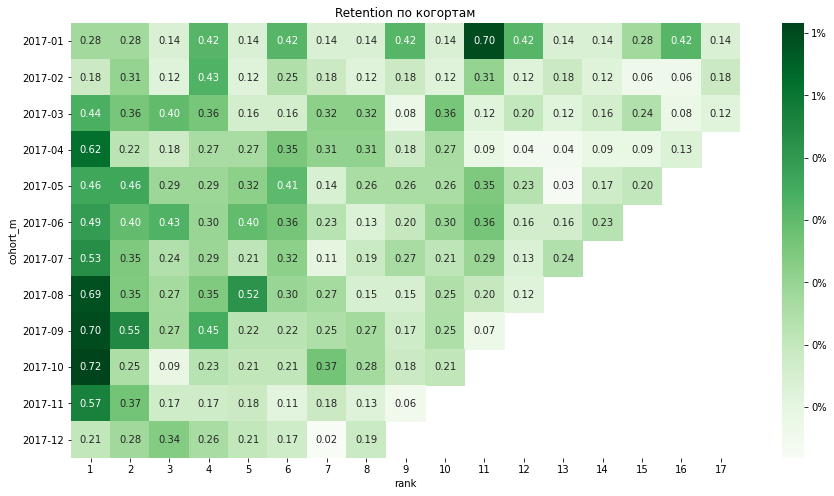

In [60]:
#Выведу на график для более легкого восприятия информации
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table*100, annot=True, fmt=".2f", cmap="Greens", cbar_kws={'format': '%.0f%%'})
plt.title("Retention по когортам")
plt.show()

На графике смотрим на 3 месяц. В данном случае он идет под рангом 2, так как расчёт начинается с нуля. Исключил 0 месяц т.к он ухудшает восприятие на графике(100% показатель для 0 месяца). Как видим, во 2 месяце наиболее темный оттенок у когорты 2017-09
с Retention Rate 0.55%

# Ответ: Когорта 2017-09 имеет наибольший Retention Rate на 3 месяц в период с января по декабрь

## 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (23 балла)

In [61]:
order_price=order_items.groupby('order_id',as_index=False).agg({'price':'sum'})
order_price

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [62]:
for_rfm=orders.merge(customers,how='left',on='customer_id')

In [63]:
for_rfm=for_rfm.merge(order_price,how='left',on='order_id')

In [64]:
for_rfm_total=for_rfm.query('order_status=="delivered"')\
.groupby('customer_unique_id',as_index=False)\
.agg({'order_purchase_timestamp':'max',
      'order_id':'nunique',
      'price':'sum',})\

In [65]:
for_rfm_total['Recency']=maybe_today_date-for_rfm_total['order_purchase_timestamp']

In [66]:
for_rfm_total.columns=['User_id','order_purchase_timestamp','Frequency','Monetary','Recency']

In [67]:
for_rfm_total['Recency']=for_rfm_total['Recency'].dt.days

In [68]:
rfm_total=for_rfm_total[['User_id','Recency','Frequency','Monetary']]

In [69]:
rfm_total.describe()

,Recency,Frequency,Monetary
count,93358.000000,93358.000000,93358.000000
mean,286.115052,1.033420,141.621480
std,152.591858,0.209097,215.694014
min,49.000000,1.000000,0.850000
25%,163.000000,1.000000,47.650000
50%,267.000000,1.000000,89.730000
75%,394.000000,1.000000,154.737500
max,762.000000,15.000000,13440.000000


In [70]:
rm_quintiles = rfm_total[['Recency', 'Monetary']].quantile([.20,.40, .60,.80]).to_dict()
f_quintiles  = rfm_total[['Frequency']].quantile([.98,.9999]).to_dict()

In [71]:
rm_quintiles
f_quintiles

{'Frequency': {0.98: 2.0, 0.9999: 5.664299999989453}}

In [72]:
def r_score(x):
    if x <= rm_quintiles['Recency'][.2]:
        return 5
    elif x <= rm_quintiles['Recency'][.4]:
        return 4
    elif x <= rm_quintiles['Recency'][.6]:
        return 3
    elif x <= rm_quintiles['Recency'][.8]:
        return 2
    else:
        return 1 

def m_score(x):
    if x <= rm_quintiles['Monetary'][.2]:
        return 1
    elif x <= rm_quintiles['Monetary'][.4]:
        return 2
    elif x <= rm_quintiles['Monetary'][.6]:
        return 3
    elif x <= rm_quintiles['Monetary'][.8]:
        return 4
    else:
        return 5
    
def f_score(x):
    if x <= f_quintiles['Frequency'][.98]:
        return 1
    if x <= f_quintiles['Frequency'][.9999]:
        return 2
    else:
        return 3

In [73]:
rfm_total['R'] = rfm_total['Recency'].apply(lambda   x: r_score(x))
rfm_total['F'] = rfm_total['Frequency'].apply(lambda x: f_score(x))
rfm_total['M'] = rfm_total['Monetary'].apply(lambda  x: m_score(x))

In [74]:
rfm_total['RFM Score'] = rfm_total['R'].map(str) + rfm_total['F'].map(str) + rfm_total['M'].map(str)

In [75]:
rfm=rfm_total

In [76]:
segt_map = {
    r'[1-2][1-2][1-2]': 'Уснувшие',
    r'[1-2][1-3][2-5]': 'Стоит пробудить',
    r'[3-5][2-3][1-5]': 'Лояльные клиенты',
    r'[4-5][1-3][4-5]': 'Основные клиенты',
    r'[4-5]1[1-2]': 'Новые пользователи',
    r'[4-5]1[3-5]': 'Многообещающие',
    r'3[1-3][1-5]': 'Засыпают'
}
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)


 R - время от последней покупки пользователя до текущей даты, 
 F - суммарное количество покупок у пользователя за всё время, 
 M - сумма покупок за всё время.

In [77]:
rfm.Segment.unique()

array(['Основные клиенты', 'Новые пользователи', 'Уснувшие',
       'Стоит пробудить', 'Засыпают', 'Многообещающие',
       'Лояльные клиенты'], dtype=object)

В целом, два показателя разделил на 5 рангов это Recency и Monetary. Значения различаются в зависимости от процентиля. 
Но показатель Frequency, поделил на 3 ранга, т.к он до 0.98 был равен  = 1 и данные просто перескачат сразу на ранг 5. По этой причине 1-2 заказа это ранг 1, больше 2 и до 5 это 3 заказа и выше 5 заказов это 3 Rank Frequency.

Переходя далее:

Итого сегментов: 7 видов сегментов

1.Новые пользователи - Совершие не так давно заказ, будем наблюдать за их продвижением

2.Многообещающие - Опять же пользователи пришли недавно, но их различие в том что они у них выше чеки и потенциально имеют большее влияние

3.Уснувшие - Клиенты с небольшим чеком и частотой заказа, которые длительное время не совершают заказы

4.Стоит пробудить - Клиенты с высоким чеком или частотой, либо и то и другое на высоком уровне. Однако, уже очень длительное время не совершают какие-либо заказы. Их беру во внимание как сегмент тех, кому стоит направить пуш или акцию для пробуждения

5.Засыпают - Сегмент клиентов, который в процессе того чтобы перейти в статус Уснувших. Из-за того что они не так давно делали заказ и вполне могут уснуть. Им вполне можно направить напоминалку избранных товаров или прочего, что они рассматривалли на платформе.

6.Основные клиенты - на текущий момент основная аудитория проекта с высоким чеком и недавней покупкой. Приносящая большую долю прибыли 

7.Лояльные клиенты - Клиенты с высокой частотой заказа, независимо от суммы чека. С лояльностью есть нюансы, очень низкая доля людей, которые совершают покупки больше одного раза



In [78]:
for_fig=rfm.groupby('Segment',as_index=False).agg({'User_id':'count'})

In [81]:
fig=px.treemap(for_fig, path=['Segment'],values='User_id', width=800, height=400)
fig.update_layout(
    treemapcolorway = ["Red", "Yellow","Orange","Blue","LightGreen","Green"], #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [80]:
for_fig

,Segment,User_id
0,Засыпают,18651
1,Лояльные клиенты,157
2,Многообещающие,6882
3,Новые пользователи,15136
4,Основные клиенты,15260
5,Стоит пробудить,21395
6,Уснувшие,15877


В целом, смотря на данные. Выделяется Сегмент Лояльных клиентов, а выделяется он малым количеством среди всех.Очень сильно преобладает факт того, что клиенты делают всего один заказ. Это замечается на данных в процентилях и среднем значений кол-во заказов на клиента. А лояльность подразумевает в себе частоту заказа, независимо от заказа. Ну и дополнительно не добавлял к лояльным клиентов с довольно поздним последним заказом. Данный сегмент вполне можно было не учитывать, но мне показалось что Лояльность один из важных показателей в проекте и понимать насколько высока лояльность среди клиентов будет необходимо. Остальные сегменты описал выше